In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')

In [2]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

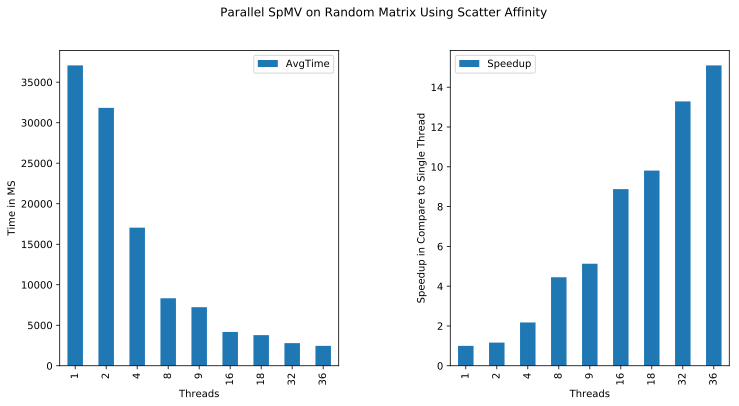

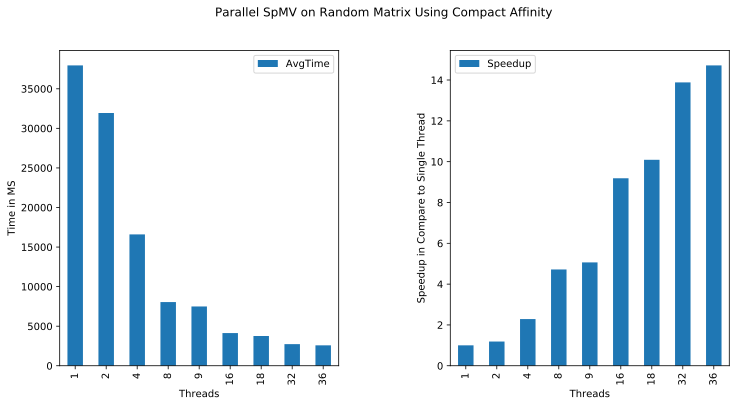

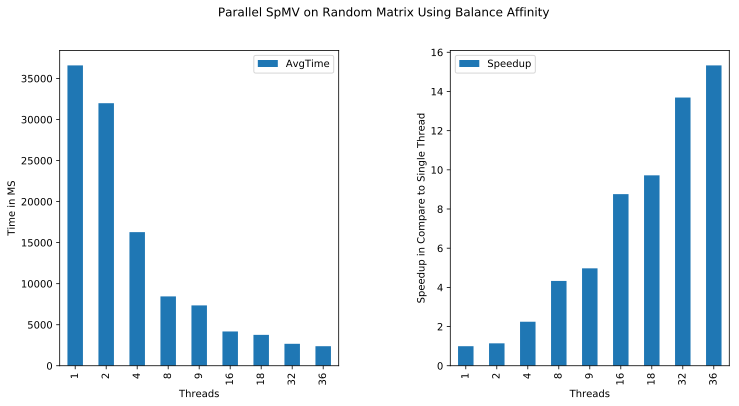

In [4]:
pdf = matplotlib.backends.backend_pdf.PdfPages("Skylake_Parallel_SpMV_Using_Different_Affinity_on_Random_Matrix.pdf")
random_dataset = pd.read_csv("SkyLake_OMP_CSR_SpMV_Model.csv")
random_dataset_scatter = random_dataset[random_dataset["AffinityType"] == "scatter"]
random_dataset_compact = random_dataset[random_dataset["AffinityType"] == "compact"]
random_dataset_balance = random_dataset[random_dataset["AffinityType"] == "balance"]

random_dataset_scatter = random_dataset_scatter.sort_values(by=["Threads"])
random_dataset_scatter.reset_index(drop=True)
fig2, ax2 = plt.subplots(nrows=1, ncols=2)
fig2.set_size_inches(12, 6)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(bottom=0.15)
ax = random_dataset_scatter.plot(kind='bar', ax=ax2[0], x='Threads', y='AvgTime')
ax.set_ylabel('Time in MS')
random_dataset_scatter["Speedup"] =  [float(random_dataset_scatter[random_dataset_scatter["Threads"] == 1]["AvgTime"])/x for x in random_dataset_scatter["AvgTime"].tolist()]
ax = random_dataset_scatter.plot(kind='bar', ax=ax2[1], x='Threads', y='Speedup')
ax.set_ylabel('Speedup in Compare to Single Thread')
fig2.suptitle("Parallel SpMV on Random Matrix Using Scatter Affinity")
pdf.savefig(bbox_inches = 'tight')

random_dataset_compact = random_dataset_compact.sort_values(by=["Threads"])
random_dataset_compact.reset_index(drop=True)
fig2, ax2 = plt.subplots(nrows=1, ncols=2)
fig2.set_size_inches(12, 6)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(bottom=0.15)
ax = random_dataset_compact.plot(kind='bar', ax=ax2[0], x='Threads', y='AvgTime')
ax.set_ylabel('Time in MS')
random_dataset_compact["Speedup"] =  [float(random_dataset_compact[random_dataset_compact["Threads"] == 1]["AvgTime"])/x for x in random_dataset_compact["AvgTime"].tolist()]
ax = random_dataset_compact.plot(kind='bar', ax=ax2[1], x='Threads', y='Speedup')
ax.set_ylabel('Speedup in Compare to Single Thread')
fig2.suptitle("Parallel SpMV on Random Matrix Using Compact Affinity")
# plt.show()
pdf.savefig(bbox_inches = 'tight')

random_dataset_balance = random_dataset_balance.sort_values(by=["Threads"])
random_dataset_balance.reset_index(drop=True)
fig2, ax2 = plt.subplots(nrows=1, ncols=2)
fig2.set_size_inches(12, 6)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(bottom=0.15)
ax = random_dataset_balance.plot(kind='bar', ax=ax2[0], x='Threads', y='AvgTime')
ax.set_ylabel('Time in MS')
random_dataset_balance["Speedup"] =  [float(random_dataset_balance[random_dataset_balance["Threads"] == 1]["AvgTime"])/x for x in random_dataset_balance["AvgTime"].tolist()]
ax = random_dataset_balance.plot(kind='bar', ax=ax2[1], x='Threads', y='Speedup')
ax.set_ylabel('Speedup in Compare to Single Thread')
fig2.suptitle("Parallel SpMV on Random Matrix Using Balance Affinity")
pdf.savefig(bbox_inches = 'tight')

pdf.close()

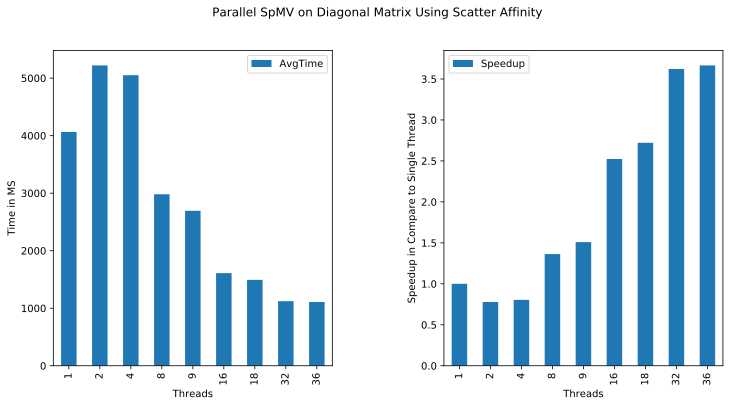

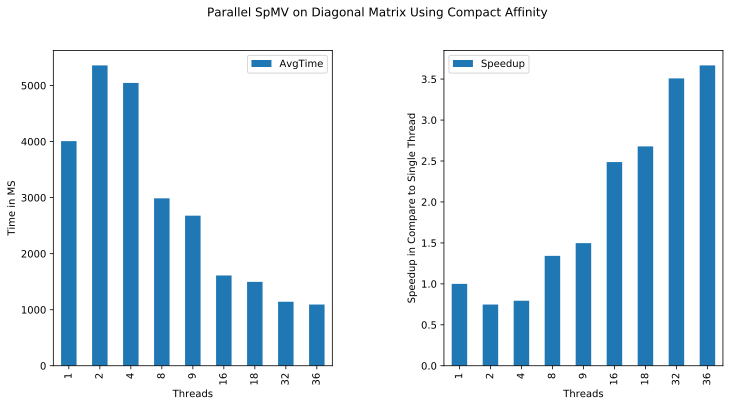

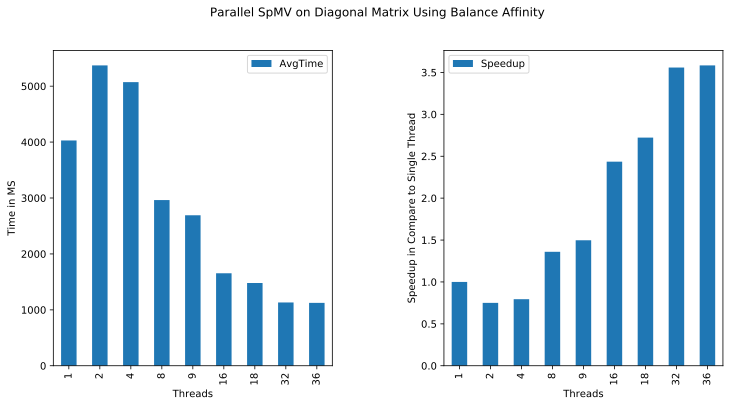

In [6]:
pdf = matplotlib.backends.backend_pdf.PdfPages("Skylake_Parallel_SpMV_Using_Different_Affinity_on_Diagonal_Matrix.pdf")
random_dataset = pd.read_csv("SkyLake_OMP_CSR_SpMV_Model_on_Diagonal_Matrix.csv")
random_dataset_scatter = random_dataset[random_dataset["AffinityType"] == "scatter"]
random_dataset_compact = random_dataset[random_dataset["AffinityType"] == "compact"]
random_dataset_balance = random_dataset[random_dataset["AffinityType"] == "balance"]

random_dataset_scatter = random_dataset_scatter.sort_values(by=["Threads"])
random_dataset_scatter.reset_index(drop=True)
fig2, ax2 = plt.subplots(nrows=1, ncols=2)
fig2.set_size_inches(12, 6)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(bottom=0.15)
ax = random_dataset_scatter.plot(kind='bar', ax=ax2[0], x='Threads', y='AvgTime')
ax.set_ylabel('Time in MS')
random_dataset_scatter["Speedup"] =  [float(random_dataset_scatter[random_dataset_scatter["Threads"] == 1]["AvgTime"])/x for x in random_dataset_scatter["AvgTime"].tolist()]
ax = random_dataset_scatter.plot(kind='bar', ax=ax2[1], x='Threads', y='Speedup')
ax.set_ylabel('Speedup in Compare to Single Thread')
fig2.suptitle("Parallel SpMV on Diagonal Matrix Using Scatter Affinity")
pdf.savefig(bbox_inches = 'tight')

random_dataset_compact = random_dataset_compact.sort_values(by=["Threads"])
random_dataset_compact.reset_index(drop=True)
fig2, ax2 = plt.subplots(nrows=1, ncols=2)
fig2.set_size_inches(12, 6)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(bottom=0.15)
ax = random_dataset_compact.plot(kind='bar', ax=ax2[0], x='Threads', y='AvgTime')
ax.set_ylabel('Time in MS')
random_dataset_compact["Speedup"] =  [float(random_dataset_compact[random_dataset_compact["Threads"] == 1]["AvgTime"])/x for x in random_dataset_compact["AvgTime"].tolist()]
ax = random_dataset_compact.plot(kind='bar', ax=ax2[1], x='Threads', y='Speedup')
ax.set_ylabel('Speedup in Compare to Single Thread')
fig2.suptitle("Parallel SpMV on Diagonal Matrix Using Compact Affinity")
# plt.show()
pdf.savefig(bbox_inches = 'tight')

random_dataset_balance = random_dataset_balance.sort_values(by=["Threads"])
random_dataset_balance.reset_index(drop=True)
fig2, ax2 = plt.subplots(nrows=1, ncols=2)
fig2.set_size_inches(12, 6)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(bottom=0.15)
ax = random_dataset_balance.plot(kind='bar', ax=ax2[0], x='Threads', y='AvgTime')
ax.set_ylabel('Time in MS')
random_dataset_balance["Speedup"] =  [float(random_dataset_balance[random_dataset_balance["Threads"] == 1]["AvgTime"])/x for x in random_dataset_balance["AvgTime"].tolist()]
ax = random_dataset_balance.plot(kind='bar', ax=ax2[1], x='Threads', y='Speedup')
ax.set_ylabel('Speedup in Compare to Single Thread')
fig2.suptitle("Parallel SpMV on Diagonal Matrix Using Balance Affinity")
pdf.savefig(bbox_inches = 'tight')

pdf.close()